In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)


In [2]:
#!/usr/bin/python

'''
File name : OpenRetina_manipulations.ipynb
Authors : Pierre Albiges, Victor Boutin and Laurent Perrinet
Date created : 2017-04-25
Date last modified : 2017-04-26
Object : Apprehend the OpenRetina project through the manipulation of the Photoreceptor class

See https://github.com/laurentperrinet/openRetina/blob/master/src/openRetina.py
'''

from __future__ import division, print_function
#import io #Core tools for working with streams. Not used in PhotoReceptor?
#import struct #Interpret strings as packed binary data. Not used in PhotoReceptor?
import array
import numpy as np
#import zmq #Lightweight messaging implementation? Not used?
import time
#import sys #System-specific parameters and functions. Not used?

from multiprocessing.pool import ThreadPool
from collections import deque
from distutils.version import LooseVersion
class PhotoReceptor :
    def __init__(self, w, h, cam_id=0, DOWNSCALE=-1, verbose = True) :
        self.sleep_time = 2 #Letting the camera warming up for 2 seconds
        self.fps = 90
        self.led = False
        print ('h =', h, 'w =', w)
        self.h, self.w = h, w
        
        '''Which camera handler will be used?
        
        pygame ? https://softwarerecs.stackexchange.com/questions/18134/python-library-for-taking-camera-images
        
        '''

        '''On other Unix systems'''
        self.rpi = False


        import cv2 # http://wiki.ros.org/opencv3#Python

        self.cap = cv2.VideoCapture(cam_id)
        if verbose: print ("dim before : {0}, dim2 : {1}".format(self.h,self.w))

        if LooseVersion(cv2.__version__).version[0] == 2:

            self.cap.set(cv2.cv.CV_CAP_PROP_FRAME_WIDTH, self.w)
            self.cap.set(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT, self.h) 

            self.DOWNSCALE = DOWNSCALE
            if DOWNSCALE > 1 :
                W = self.cap.get(cv2.cv.CV_CAP_PROP_FRAME_WIDTH)
                H = self.cap.set(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT)
                self.cap.set(cv2.cv.CV_CAP_PROP_FRAME_WIDTH, W/self.DOWNSCALE)
                self.cap.set(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT, H/self.DOWNSCALE)
            self.h, self.w = self.cap.get(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT), self.cap.get(cv2.cv.CV_CAP_PROP_FRAME_WIDTH)
            if verbose:
                print ('Using OpenCV')
        
        else:     

            self.cap.set(cv2.CAP_PROP_FRAME_WIDTH, self.w)
            self.cap.set(cv2.CAP_PROP_FRAME_HEIGHT, self.h)

            self.DOWNSCALE = DOWNSCALE
            if DOWNSCALE > 1:
                W = self.cap.get(cv2.CAP_PROP_FRAME_WIDTH)
                H = self.cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
                self.cap.set(cv2.CAP_PROP_FRAME_WIDTH, W//self.DOWNSCALE)
                self.cap.set(cv2.CAP_PROP_FRAME_HEIGHT, H//self.DOWNSCALE)
            self.h, self.w = self.cap.get(cv2.CAP_PROP_FRAME_HEIGHT), self.cap.get(cv2.CAP_PROP_FRAME_WIDTH)
            if verbose: print('Using OpenCV3')

        if verbose: print ("dim after : {0}, dim2 : {1}".format(self.h,self.w))


    def grab(self) :
        if self.rpi : #At this point, the image is available as stream.array
            frame = self.stream.array
        else :
            import cv2
            ret, frame_bgr = self.cap.read() #What does ret means? Is it not used?
            frame = frame_bgr[:, :, ::-1] #BGR to RBG. Necessary due to different display mode in cv2 and np?
            #frame = frame_bgr
#            cv2.imshow('frame',frame)
#                break
        return frame
    
    def close(self) :
        print('debugging key n.1')
        if self.rpi : #is == True ?
            self.camera.stop_preview()
            self.camera.close()
        else :
            import cv2
            self.cap.release()
            del self.cap
#            if cv2.waitKey(1) & 0xFF == ord('q') :
#                cv2.destroyAllWindows()



In [3]:
Ph = PhotoReceptor(w=1280, h=720)
frame = Ph.grab()
print (frame.shape)
help(Ph.cap.read)
Ph.close()

h = 720 w = 1280
dim before : 720, dim2 : 1280
Using OpenCV3
dim after : 720.0, dim2 : 1280.0
(720, 1280, 3)
Help on built-in function read:

read(...) method of cv2.VideoCapture instance
    read([, image]) -> retval, image

debugging key n.1


In [4]:
help(Ph)

Help on PhotoReceptor in module __main__ object:

class PhotoReceptor(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, w, h, cam_id=0, DOWNSCALE=-1, verbose=True)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  close(self)
 |  
 |  grab(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



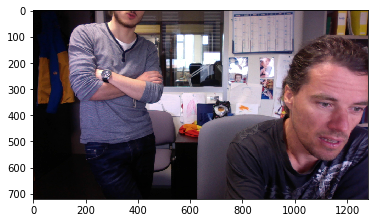

In [5]:
plt.imshow(frame)